# aSPEM Experiment : analysis




In [1]:
!ls data/

lup_0_2017-05-24_160243.npy  psychophysique_chloe_0_2017-05-31_165237.npy
lup_1_2017-05-24_160243.npy  psychophysique_chloe_1_2017-05-31_165237.npy


In [2]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import

%matplotlib inline
fig_width = 12

from aSPEM import aSPEM
e = aSPEM()
p = e.params_protocol['p']
N_trials = e.params_protocol['N_trials']
N_blocks = e.params_protocol['N_blocks']
timeStr = '2017-05-31_165237'
observer = 'chloe'
mode = 'psychophysique'

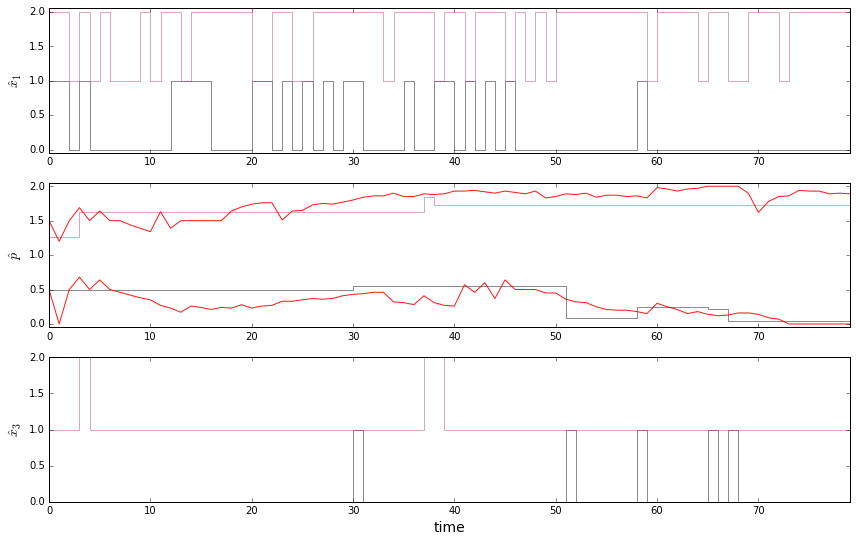

In [3]:
corrects = e.plot(mode, observer, N_trials, N_blocks, p, timeStr, fig_width)

In [4]:
print (corrects / N_trials / N_blocks *100, '%')

5.625 %
